Relatorio:

* Serão 30 tipos de atributos.
  - Com 3 subdivisão:
    - mean / media
    - standart error / erro padrão
    - worst, largest / pior, maior
  
* No total temos 569 números de instancia. 
* tendo no final dois valores existentes
  - Benigno ou Maligno.

In [ ]:
import torch

In [ ]:
class Net(torch.nn.Module):
  def __init__(self, input_size, hidden_size):
    super(Net, self).__init__()
    self.input_size = input_size
    self.hidden_size = hidden_size
    self.fc1 = torch.nn.Linear(self.input_size, self.hidden_size) #full connected
    self.relu = torch.nn.ReLU() #(0, infinito)
    self.fc2 = torch.nn.Linear(self.hidden_size, 1)
    self.sigmoid = torch.nn.Sigmoid() #(0, 1)
  def forward(self, x):
    hidden = self.fc1(x)
    relu = self.relu(hidden)
    output = self.fc2(relu)
    output = self.sigmoid(output)
    return output

In [ ]:
from sklearn import datasets
bc = datasets.load_breast_cancer()
dados = bc.data
classes = bc.target
nomesClasses = bc.target_names

In [ ]:
classes.size

569

In [ ]:
dados

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [ ]:
for coluna in dados.T:
  # print(coluna.max()) # Valores máximos de cada coluna
  if coluna.max() < 1:
    coluna = coluna / 1
  elif coluna.max() < 10:
    coluna /= 10
  elif coluna.max() < 100:
    coluna /= 100
  elif coluna.max() < 1000:
    coluna /= 1000
  elif coluna.max() < 10000:
    coluna /= 10000
  else:
    print('Erro')

In [ ]:
entrada = torch.FloatTensor(dados)
saida = torch.FloatTensor(classes)
print(saida)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0.,
        0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1.,
        0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1.,
        1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1.,
        0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1.,
        0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1.,
        1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0.,
        0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1.,
        0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0.,
        0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0.,
        1., 1., 0., 0., 1., 1., 1., 0., 

In [ ]:
from sklearn.utils import shuffle
print(entrada, saida)
entrada, saida = shuffle(entrada, saida)
print(entrada, saida)

tensor([[0.1799, 0.1038, 0.1228,  ..., 0.2654, 0.4601, 0.1189],
        [0.2057, 0.1777, 0.1329,  ..., 0.1860, 0.2750, 0.0890],
        [0.1969, 0.2125, 0.1300,  ..., 0.2430, 0.3613, 0.0876],
        ...,
        [0.1660, 0.2808, 0.1083,  ..., 0.1418, 0.2218, 0.0782],
        [0.2060, 0.2933, 0.1401,  ..., 0.2650, 0.4087, 0.1240],
        [0.0776, 0.2454, 0.0479,  ..., 0.0000, 0.2871, 0.0704]]) tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0.,
        0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1.,
        0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1.,
        1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1.,
        0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1.,
        0., 0., 1., 0., 1., 0., 0., 1., 0.

In [ ]:
entrada_treinamento = entrada[0:525, :]
saida_treinamento = saida[0:525]
entrada_testes = entrada[525:569, :]
saida_testes = saida[525:569]
print(entrada_testes)
print(saida_testes)

tensor([[0.1242, 0.1504, 0.0786,  ..., 0.0405, 0.2901, 0.0678],
        [0.1940, 0.2350, 0.1291,  ..., 0.1564, 0.2920, 0.0761],
        [0.2722, 0.2187, 0.1821,  ..., 0.2688, 0.2856, 0.0808],
        ...,
        [0.1394, 0.1317, 0.0903,  ..., 0.1015, 0.2160, 0.0725],
        [0.1775, 0.2803, 0.1173,  ..., 0.1970, 0.2972, 0.0908],
        [0.0873, 0.1684, 0.0553,  ..., 0.0000, 0.2445, 0.0887]])
tensor([1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0.,
        1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
        0., 0., 1., 1., 0., 1., 0., 1.])


In [ ]:
# Montar o modelo para o treinamento
print(entrada_treinamento.size())
input_size = entrada_treinamento.size()[1]
hidden_size = 25
modelo = Net(input_size, hidden_size)
print(modelo)

# Configurações do modelo
criterion = torch.nn.BCELoss() # Binary Cross Entropy
criterion = torch.nn.MSELoss() # Mean Square Error
optimizer = torch.optim.SGD(modelo.parameters(), lr = 0.8, momentum = 0.3)

torch.Size([525, 30])
Net(
  (fc1): Linear(in_features=30, out_features=25, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=25, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


In [ ]:
epochs = 1500000 # Quantidade de épocas de treinamento

errors = [] # Criando um array vazio para guardar os erros de cada epoca

for epoch in range(epochs):
  optimizer.zero_grad()
  # Forward pass
  y_pred = modelo(entrada_treinamento)
  #Compute Loss
  loss = criterion(y_pred.squeeze(), saida_treinamento)
  errors.append(loss.item())
  if epoch % 10000 == 0:
    print('Epoch {}: train loss: {}'.format(epoch, loss.item()))
  #Backward pass
  loss.backward()
  optimizer.step()

Epoch 0: train loss: 0.25235652923583984
Epoch 10000: train loss: 0.012504125013947487
Epoch 20000: train loss: 0.01085455622524023
Epoch 30000: train loss: 0.009818676859140396
Epoch 40000: train loss: 0.009008088149130344
Epoch 50000: train loss: 0.008330550976097584
Epoch 60000: train loss: 0.007768820971250534
Epoch 70000: train loss: 0.007316704839468002
Epoch 80000: train loss: 0.006966878660023212
Epoch 90000: train loss: 0.00670286500826478
Epoch 100000: train loss: 0.00650563882663846
Epoch 110000: train loss: 0.006358070764690638
Epoch 120000: train loss: 0.00624697282910347
Epoch 130000: train loss: 0.006161903031170368
Epoch 140000: train loss: 0.006096027325838804
Epoch 150000: train loss: 0.0060442169196903706
Epoch 160000: train loss: 0.0060026939027011395
Epoch 170000: train loss: 0.005969048477709293
Epoch 180000: train loss: 0.005941497161984444
Epoch 190000: train loss: 0.00591841759160161
Epoch 200000: train loss: 0.005899039562791586
Epoch 210000: train loss: 0.005

In [ ]:
y_pred = modelo(entrada_testes)


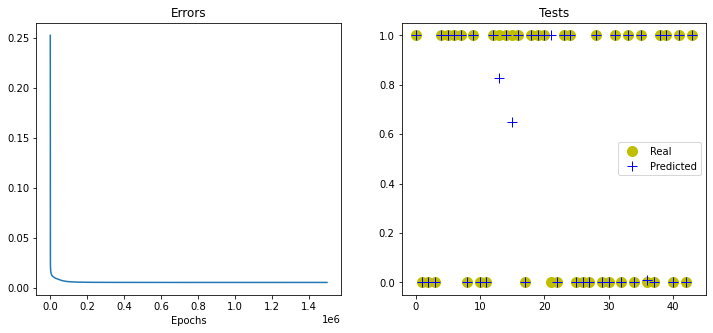

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
def plotcharts(errors):
    errors = np.array(errors)
    plt.figure(figsize=(12, 5))
    graf02 = plt.subplot(1, 2, 1) # nrows, ncols, index
    graf02.set_title('Errors')
    plt.plot(errors, '-')
    plt.xlabel('Epochs')
    graf03 = plt.subplot(1, 2, 2)
    graf03.set_title('Tests')
    a = plt.plot(saida_testes.numpy(), 'yo', label='Real')
    plt.setp(a, markersize=10)
    a = plt.plot(y_pred.detach().numpy(), 'b+', label='Predicted')
    plt.setp(a, markersize=10)
    plt.legend(loc=7)
    plt.show()
plotcharts(errors)

In [ ]:
classes.size

569